In [4]:
import scanpy as sc
import os
import pandas as pd

In [2]:
#read in the files
data = sc.read_h5ad('/scratch/user/s4436039/scdata/Myeloid_Objects/NR_data_intersect.h5ad')
data_clean = sc.read_h5ad('/scratch/user/s4436039/scdata/Python_Integration_Sep/NRclean_clustered2.h5ad')

In [3]:
data

AnnData object with n_obs × n_vars = 623908 × 15074
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id'
    var: 'name'

In [4]:
data_clean

AnnData object with n_obs × n_vars = 498023 × 1268
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'cancer_type_broad', 'clean-leiden_0.8', 'clean-subcluster', 'clean-subcluster-v2', 'YS_sig', 'HSC_sig', 'CD5nDC2_up_vDC3', 'DC3_up_vCD5nDC2', 'CD5pDC2_up_vDC3', 'DC3_up_vCD5pDC2', 'DC3_up_vMono', 'Mono_up_vDC3', 'DC1_sig', 'DC2_sig', 'DC3_sig', 'DC_Axl_sig', 'DC2_up_DC3', 'DC3_up_DC2', 'mregDC_sig', 'cDC1_mregDC', 'cDC2_mregDC', 'NR_annotati

In [15]:
# only using DC so make object with just DC
data_clean_DC = data_clean[data_clean.obs["NR_annotations_simple"].isin(["cDC1","cDC2","mregDC"])]

In [16]:
data_clean_DC

View of AnnData object with n_obs × n_vars = 30241 × 1268
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'cancer_type_broad', 'clean-leiden_0.8', 'clean-subcluster', 'clean-subcluster-v2', 'YS_sig', 'HSC_sig', 'CD5nDC2_up_vDC3', 'DC3_up_vCD5nDC2', 'CD5pDC2_up_vDC3', 'DC3_up_vCD5pDC2', 'DC3_up_vMono', 'Mono_up_vDC3', 'DC1_sig', 'DC2_sig', 'DC3_sig', 'DC_Axl_sig', 'DC2_up_DC3', 'DC3_up_DC2', 'mregDC_sig', 'cDC1_mregDC', 'cDC2_mregDC', 'NR_a

## subset data to only the cells in data_clean_DC based on barcode 

In [17]:
# Get the list of barcodes (cell names) in data_clean
barcodes_to_keep = data_clean_DC.obs.index

In [18]:
# subset data to just those in data_clean
data_subset = data[data.obs.index.isin(barcodes_to_keep), :]

In [19]:
data_subset

View of AnnData object with n_obs × n_vars = 30241 × 15074
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id'
    var: 'name'

## Transfer desired metadata to data_subset
* NR_annotations_simple
* sample_type_major2
* cancer_with_H
* cancer_broadest

In [20]:
meta_columns = ['NR_annotations_simple','sample_type_major2','cancer_with_H','cancer_broadest']

In [21]:
# Subset the metadata in data_clean to match data_subset's barcodes
metadata_to_transfer = data_clean_DC.obs.loc[data_subset.obs.index, meta_columns]

In [22]:
# Add these columns to data_subset's obs
for col in meta_columns:
    data_subset.obs[col] = metadata_to_transfer[col]

/scratch/temp/11976141/ipykernel_2421827/2010837473.py:3: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  data_subset.obs[col] = metadata_to_transfer[col]


In [24]:
# Verify that the metadata was transferred
data_subset.obs.tail()

,nCount_RNA,nFeature_RNA,sample_type,cancer_type,patient_id,sample_id,percent.mt,site,sample_type_major,cancer_subtype,integration_id,ident,dataset_id,NR_annotations_simple,sample_type_major2,cancer_with_H,cancer_broadest
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY_GTTTACTCAAGGCCTC,-9.995153,-8.131683,Adnexa,HGSOC,Left Adnexa,SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY,2694.0,ovary,primary tumour,HGSOC,GSE180661_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY,all_integrated_intersect,GSE180661,cDC1,primary tumour,HGSOC,HGSOC
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY_TACCGAACAAACCGGA,-9.134331,-8.627023,Adnexa,HGSOC,Left Adnexa,SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY,839.0,ovary,primary tumour,HGSOC,GSE180661_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY,all_integrated_intersect,GSE180661,cDC2,primary tumour,HGSOC,HGSOC
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY_TCACGCTTCCGTCACT,-10.033317,-7.518040,Adnexa,HGSOC,Left Adnexa,SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY,1683.0,ovary,primary tumour,HGSOC,GSE180661_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY,all_integrated_intersect,GSE180661,mregDC,primary tumour,HGSOC,HGSOC
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY_TGCAGTAGTGTTGCCG,-9.364501,-8.566583,Adnexa,HGSOC,Left Adnexa,SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY,2257.0,ovary,primary tumour,HGSOC,GSE180661_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY,all_integrated_intersect,GSE180661,cDC2,primary tumour,HGSOC,HGSOC
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY_TGTGAGTTCGGAAACG,-9.738727,-7.459797,Adnexa,HGSOC,Left Adnexa,SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY,949.0,ovary,primary tumour,HGSOC,GSE180661_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY,all_integrated_intersect,GSE180661,mregDC,primary tumour,HGSOC,HGSOC


In [27]:
data_subset

AnnData object with n_obs × n_vars = 30241 × 15074
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'NR_annotations_simple', 'sample_type_major2', 'cancer_with_H', 'cancer_broadest'
    var: 'name'

In [26]:
#show current directory 
os.getcwd()
os.chdir('/scratch/user/s4436039/scdata/CytoTRACE_R')
os.getcwd()

'/scratch/user/s4436039/scdata/CytoTRACE_R'

In [28]:
#export unintegrated DC object as a h5ad object for use in seurat cytotrace
data_subset.write_h5ad("NR_unint_DC_cytotrace.h5ad", compression="gzip")

# CytoTRACE completed in R in notebook: 2024-12-13_CytoTRACE-unint-R.jpynb
* from this exported predicted order scores to a csv: CytoTRACE_Predicted_order_export.csv

# Now transfer predicted order scores back to clean/processed data:

In [2]:
#show current directory 
os.getcwd()
os.chdir('/scratch/user/s4436039/scdata/Python_Integration_Sep')
os.getcwd()

'/scratch/user/s4436039/scdata/Python_Integration_Sep'

In [13]:
data_clean = sc.read_h5ad('/scratch/user/s4436039/scdata/Python_Integration_Sep/NRclean_clustered2.h5ad')

In [7]:
# read in csv
Cyto = pd.read_csv('/scratch/user/s4436039/scdata/CytoTRACE_R/CytoTRACE_Predicted_order_export.csv', index_col=0)

In [14]:
Cyto

,CytoTRACE_Predicted_order
GSE215120_AM1_AAATGCCCAGAGCCAA-1,0.354550
GSE215120_AM1_ACACTGATCCACTGGG-1,0.370462
GSE215120_AM1_ACAGCCGCAAACCTAC-1,0.552461
GSE215120_AM1_ACCAGTAAGACTGGGT-1,0.440080
GSE215120_AM1_ACGTCAACAAGGACTG-1,0.747389
...,...
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY_GTTTACTCAAGGCCTC,0.688712
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY_TACCGAACAAACCGGA,0.415216
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY_TCACGCTTCCGTCACT,0.055196
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY_TGCAGTAGTGTTGCCG,0.467926


In [15]:
data_clean.obs

,nCount_RNA,nFeature_RNA,sample_type,cancer_type,patient_id,sample_id,percent.mt,site,sample_type_major,cancer_subtype,...,DC2_up_DC3,DC3_up_DC2,mregDC_sig,cDC1_mregDC,cDC2_mregDC,NR_annotations,NR_annotations_simple,sample_type_major2,cancer_with_H,cancer_broadest
GSE215120_AM1_AAACCTGGTTGCTCCT-1,20298.000000,3789.000000,tumour,Acral Melanoma,AM1,GSE215120_Acral_MEL_AM1,0.975466,skin,primary tumour,Acral Melanoma,...,0.588479,0.082309,0.435951,0.279165,0.553687,Tissue resident macrophage,Tissue resident macrophage,primary tumour,Acral Melanoma,MEL
GSE215120_AM1_AAAGATGTCCAAATGC-1,5574.000000,1721.000000,tumour,Acral Melanoma,AM1,GSE215120_Acral_MEL_AM1,6.045928,skin,primary tumour,Acral Melanoma,...,0.096703,0.189334,0.275931,0.177009,0.444586,Tissue resident macrophage,Tissue resident macrophage,primary tumour,Acral Melanoma,MEL
GSE215120_AM1_AAATGCCCAGAGCCAA-1,17143.000000,2659.000000,tumour,Acral Melanoma,AM1,GSE215120_Acral_MEL_AM1,1.224990,skin,primary tumour,Acral Melanoma,...,0.494592,0.124530,0.427229,0.259460,0.489422,cDC2,cDC2,primary tumour,Acral Melanoma,MEL
GSE215120_AM1_ACACTGAAGATCCCGC-1,5912.000000,1374.000000,tumour,Acral Melanoma,AM1,GSE215120_Acral_MEL_AM1,2.503383,skin,primary tumour,Acral Melanoma,...,0.002664,0.470527,0.223862,0.230512,0.458001,Classical monocytes,Classical monocytes,primary tumour,Acral Melanoma,MEL
GSE215120_AM1_ACACTGATCCACTGGG-1,18333.000000,2845.000000,tumour,Acral Melanoma,AM1,GSE215120_Acral_MEL_AM1,1.063656,skin,primary tumour,Acral Melanoma,...,0.649041,0.226950,0.617883,0.281696,0.620768,cDC2,cDC2,primary tumour,Acral Melanoma,MEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY_TTTCATGGTTACCTGA,-4.499666,-9.853381,Adnexa,HGSOC,Left Adnexa,SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY,1779.000000,ovary,primary tumour,HGSOC,...,-0.110346,0.352543,-0.008449,0.186892,0.480665,Classical monocytes,Classical monocytes,primary tumour,HGSOC,HGSOC
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY_TTTCGATGTGACGTCC,-4.871771,-10.337130,Adnexa,HGSOC,Left Adnexa,SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY,1541.000000,ovary,primary tumour,HGSOC,...,-0.013770,0.371402,-0.061037,0.183097,0.464420,Classical monocytes,Classical monocytes,primary tumour,HGSOC,HGSOC
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY_TTTCGATTCTGCGAGC,-4.766977,-8.292435,Adnexa,HGSOC,Left Adnexa,SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY,2596.000000,ovary,primary tumour,HGSOC,...,0.316304,0.193778,0.497721,0.163307,0.524392,Tissue resident macrophage,Tissue resident macrophage,primary tumour,HGSOC,HGSOC
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY_TTTGATCGTTGCTCCT,-4.133310,-8.758132,Adnexa,HGSOC,Left Adnexa,SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY,1200.000000,ovary,primary tumour,HGSOC,...,-0.015199,0.127235,0.068393,0.141191,0.438729,Tissue resident macrophage,Tissue resident macrophage,primary tumour,HGSOC,HGSOC


In [16]:
#check indices match
print(set(Cyto.index).issubset(set(data_clean.obs.index)))

True


In [17]:
# Add the scores to the object metadata
data_clean.obs['CytoTRACE_DC_Predicted_order'] = data_clean.obs.index.map(Cyto['CytoTRACE_Predicted_order'])

In [18]:
data_clean.obs

,nCount_RNA,nFeature_RNA,sample_type,cancer_type,patient_id,sample_id,percent.mt,site,sample_type_major,cancer_subtype,...,DC3_up_DC2,mregDC_sig,cDC1_mregDC,cDC2_mregDC,NR_annotations,NR_annotations_simple,sample_type_major2,cancer_with_H,cancer_broadest,CytoTRACE_DC_Predicted_order
GSE215120_AM1_AAACCTGGTTGCTCCT-1,20298.000000,3789.000000,tumour,Acral Melanoma,AM1,GSE215120_Acral_MEL_AM1,0.975466,skin,primary tumour,Acral Melanoma,...,0.082309,0.435951,0.279165,0.553687,Tissue resident macrophage,Tissue resident macrophage,primary tumour,Acral Melanoma,MEL,NaN
GSE215120_AM1_AAAGATGTCCAAATGC-1,5574.000000,1721.000000,tumour,Acral Melanoma,AM1,GSE215120_Acral_MEL_AM1,6.045928,skin,primary tumour,Acral Melanoma,...,0.189334,0.275931,0.177009,0.444586,Tissue resident macrophage,Tissue resident macrophage,primary tumour,Acral Melanoma,MEL,NaN
GSE215120_AM1_AAATGCCCAGAGCCAA-1,17143.000000,2659.000000,tumour,Acral Melanoma,AM1,GSE215120_Acral_MEL_AM1,1.224990,skin,primary tumour,Acral Melanoma,...,0.124530,0.427229,0.259460,0.489422,cDC2,cDC2,primary tumour,Acral Melanoma,MEL,0.354550
GSE215120_AM1_ACACTGAAGATCCCGC-1,5912.000000,1374.000000,tumour,Acral Melanoma,AM1,GSE215120_Acral_MEL_AM1,2.503383,skin,primary tumour,Acral Melanoma,...,0.470527,0.223862,0.230512,0.458001,Classical monocytes,Classical monocytes,primary tumour,Acral Melanoma,MEL,NaN
GSE215120_AM1_ACACTGATCCACTGGG-1,18333.000000,2845.000000,tumour,Acral Melanoma,AM1,GSE215120_Acral_MEL_AM1,1.063656,skin,primary tumour,Acral Melanoma,...,0.226950,0.617883,0.281696,0.620768,cDC2,cDC2,primary tumour,Acral Melanoma,MEL,0.370462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY_TTTCATGGTTACCTGA,-4.499666,-9.853381,Adnexa,HGSOC,Left Adnexa,SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY,1779.000000,ovary,primary tumour,HGSOC,...,0.352543,-0.008449,0.186892,0.480665,Classical monocytes,Classical monocytes,primary tumour,HGSOC,HGSOC,NaN
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY_TTTCGATGTGACGTCC,-4.871771,-10.337130,Adnexa,HGSOC,Left Adnexa,SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY,1541.000000,ovary,primary tumour,HGSOC,...,0.371402,-0.061037,0.183097,0.464420,Classical monocytes,Classical monocytes,primary tumour,HGSOC,HGSOC,NaN
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY_TTTCGATTCTGCGAGC,-4.766977,-8.292435,Adnexa,HGSOC,Left Adnexa,SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY,2596.000000,ovary,primary tumour,HGSOC,...,0.193778,0.497721,0.163307,0.524392,Tissue resident macrophage,Tissue resident macrophage,primary tumour,HGSOC,HGSOC,NaN
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY_TTTGATCGTTGCTCCT,-4.133310,-8.758132,Adnexa,HGSOC,Left Adnexa,SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY,1200.000000,ovary,primary tumour,HGSOC,...,0.127235,0.068393,0.141191,0.438729,Tissue resident macrophage,Tissue resident macrophage,primary tumour,HGSOC,HGSOC,NaN


### visualise CytoTRACE:

In [20]:
import matplotlib.pyplot as plt

In [19]:
colour_vars = ["CytoTRACE_DC_Predicted_order","NR_annotations_simple"]

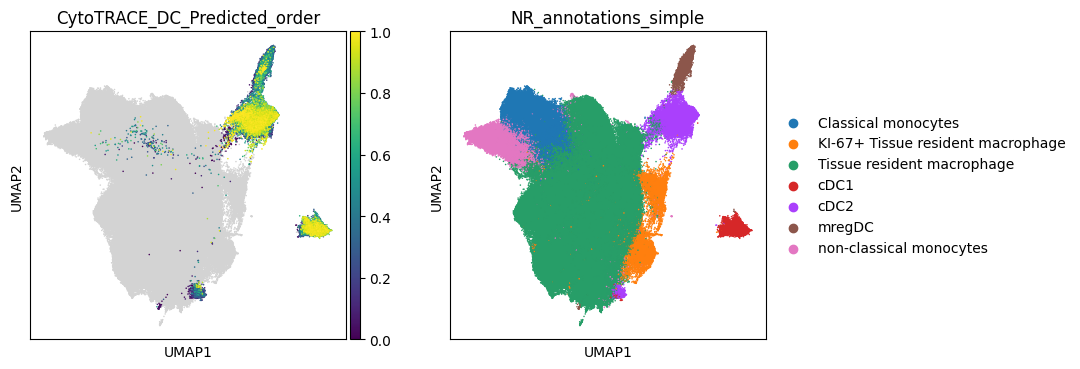

In [21]:
#plotting 
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data_clean, color=colour_vars, ncols=2, size=5)

In [22]:
#update object 
data_clean.write_h5ad("NRclean_clustered2.h5ad", compression="gzip")